In [64]:
import torch
import matplotlib.pyplot as plt

In [65]:
img_base = torch.load("./img_base.pt")
img_our = torch.load("./img_our.pt")

2


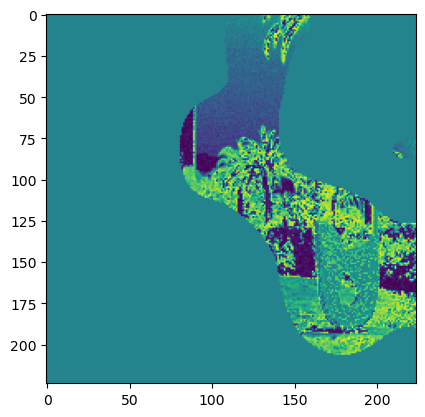

In [66]:
plt.imshow(img_base[5].squeeze().sum(0))
print(len(torch.where(img_base[5].squeeze().sum(0) == 0)))

# len(torch.where(img_base[7].sum(0) == 0)[0])

2


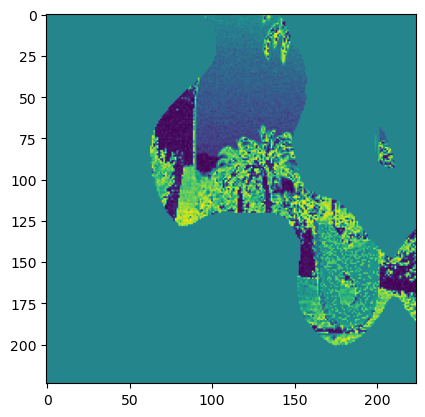

In [67]:
plt.imshow(img_our[5].squeeze().sum(0))

print(len(torch.where(img_our[5].squeeze().sum(0) == 0)))


In [68]:
img_base_spatial = torch.load("./img_base_spatial.pt")
img_our_spatial = torch.load("./img_our_spatial.pt")

2


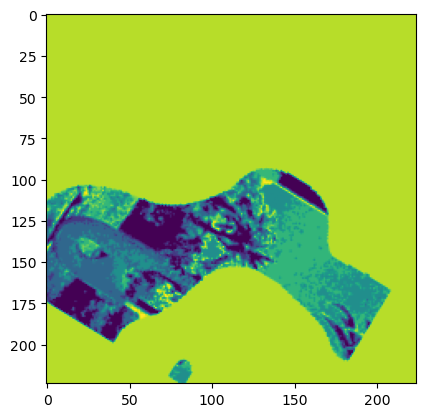

In [72]:
plt.imshow(img_base_spatial[7].squeeze().sum(0))
print(len(torch.where(img_base_spatial[7].squeeze().sum(0) == 0)))



2


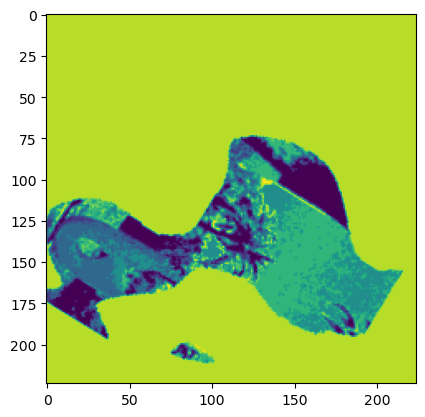

In [71]:
plt.imshow(img_our_spatial[7].squeeze().sum(0))

print(len(torch.where(img_our_spatial[7].squeeze().sum(0) == 0)))


In [51]:
from transform_factory import get_trivial_augment

In [52]:
T_spatial = get_trivial_augment(aopc=True, trans_opt='spatial')

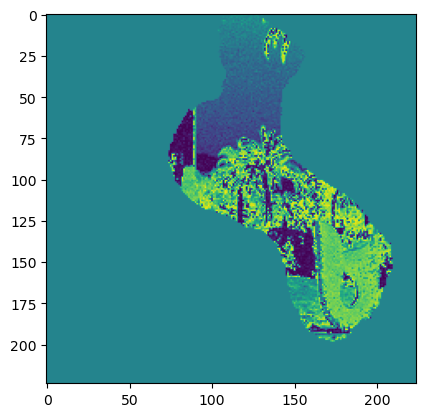

In [53]:
plt.imshow(T_spatial(img_our[5]).sum(0))